### Fromat of the generator
1. English Bible verse + hebrew text
2. List of videos to loop
3. 

In [1]:
import sys
sys.path.append('../') # so that we can import packages from parent folder

from src.video_composition.composer import VideoComposition

from src.video_composition.combo.tts_component import TTSComponent
from src.video_composition.video.looping_mp4 import LoopingMP4

import matplotlib.pyplot as plt
%matplotlib inline

#4 seconds

 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > initialization of speaker-embedding layers.


In [2]:
verse = 'Should you not fear me? declares the Lord. Should you not tremble in my presence? I made the sand a boundary for the sea, an everlasting barrier it cannot cross. The waves may roll, but they cannot prevail; they may roar, but they cannot cross it.'
hebrew = '''
הַאֹותִ֨י לֹא־תִירָ֜אוּ נְאֻם־יְהֹוָ֗ה אִ֤ם מִפָּנַי֙ לֹ֣א תָחִ֔ילוּ אֲשֶׁר־שַׂ֤מְתִּי חֹול֙ גְּב֣וּל לַיָּ֔ם חָק־עֹולָ֖ם וְלֹ֣א יַעַבְרֶ֑נְהוּ וַיִּֽתְגָּעֲשׁוּ֙ וְלֹ֣א יוּכָ֔לוּ וְהָמ֥וּ גַלָּ֖יו וְלֹ֥א יַעַבְרֻֽנְהוּ
'''
location = 'Jeremiah 5:22'

# a list of pairs of filenames and percentages
transitionTimestamps = [('light.mp4', '40'), ('waves.mp4', '60')]

print(verse)
print(hebrew)

Should you not fear me? declares the Lord. Should you not tremble in my presence? I made the sand a boundary for the sea, an everlasting barrier it cannot cross. The waves may roll, but they cannot prevail; they may roar, but they cannot cross it.

הַאֹותִ֨י לֹא־תִירָ֜אוּ נְאֻם־יְהֹוָ֗ה אִ֤ם מִפָּנַי֙ לֹ֣א תָחִ֔ילוּ אֲשֶׁר־שַׂ֤מְתִּי חֹול֙ גְּב֣וּל לַיָּ֔ם חָק־עֹולָ֖ם וְלֹ֣א יַעַבְרֶ֑נְהוּ וַיִּֽתְגָּעֲשׁוּ֙ וְלֹ֣א יוּכָ֔לוּ וְהָמ֥וּ גַלָּ֖יו וְלֹ֥א יַעַבְרֻֽנְהוּ



In [3]:
# clouds = './videos/clouds.mp4'
# cabin = './videos/cabin.mp4'
# nature = './videos/nature.mp4'

# images = [(clouds, 1/3), (cabin, 1/2), (nature, 1/6)]


# output_file = "output/bible.mp4"

# tts = TTSComponent(verse + " " + location, color=(200, 10, 0), height=1024, width=1024)

# third = tts.total_duration()/3
# half = tts.total_duration()/2
# sixth = tts.total_duration()/6

# mp4 = LoopingMP4(clouds, fps=30, start=0, duration=third, reverse_loop=True, speed_factor=1)
# mp4a = LoopingMP4(cabin, fps=30, start=third, duration=half, reverse_loop=True, speed_factor=0.5)
# mp4b = LoopingMP4(nature, fps=30, start=sixth*5, duration=sixth, reverse_loop=True, speed_factor=2)

# video_composition = VideoComposition(width=mp4.width, height=mp4.height, fps=mp4.fps)
# video_composition.add_component(mp4)
# video_composition.add_component(mp4a)
# video_composition.add_component(mp4b)

# video_composition.add_component(tts)

# video_composition.create_video(output_file)


In [4]:
# def create_composition(images, verse, location, output_path):
#     height = 1920
#     width = 1080
#     fps = 30
#     tts_component = TTSComponent(verse + " " + location, color=(200, 10, 0), height=height, width=width, fps=fps)

#     total_duration = tts_component.total_duration()
    
#     video_composition = VideoComposition(width=width, height=height, fps=fps)
    
#     current_start_time = 0
    
#     for image, fraction, speed, loop in images:
#         duration = total_duration * fraction
#         mp4_component = LoopingMP4(image, fps=30, start=current_start_time, duration=duration, reverse_loop=loop, speed_factor=speed)
        
#         video_composition.add_component(mp4_component)
#         current_start_time += duration

#     video_composition.add_component(tts_component)

#     video_composition.create_video(output_path)

# # Loop, restart, or stretch the video to match the duration of the tts
# images = [('./videos/clouds.mp4', 1/3, 2, True), ('./videos/cabin.mp4', 1/6, 3, False), ('./videos/nature.mp4', 1/2, 4, True)]
# # verse = "Some verse"
# # location = "Some location"
# output_file = "output/bible.mp4"

# create_composition(images, verse, location, output_file)



In [5]:
def match_duration_with_tts(input_video, verse, location, output_path):
    height = 1920
    width = 1080
    fps = 30

    tts_component = TTSComponent(verse + " " + location, color=(200, 10, 0), plt=plt)
    tts_duration = tts_component.total_duration()

    # Create a temporary LoopingMP4 component to get the original video duration
    video_duration = LoopingMP4.get_video_duration(input_video)
    

    # Calculate speed factor
    speed_factor = video_duration / tts_duration
    if speed_factor > 1:
        speed_factor = 1

    print("@@@@@@@@@@@@@@$$$$$$$$$$")
    print(input_video)
    print(speed_factor)
    print(tts_duration)
    print(video_duration)
    print(video_duration / speed_factor)
    print("@@@@@@@@@@@@@@$$$$$$$$$$")

    # Initialize VideoComposition
    video_composition = VideoComposition(width=width, height=height, fps=fps)

    # Create MP4 component with speed adjusted to match TTS duration
    mp4_component = LoopingMP4(input_video, fps=30, start=0, duration=tts_duration, reverse_loop=False, speed_factor=speed_factor)
    
    video_composition.add_component(mp4_component)
    video_composition.add_component(tts_component)

    video_composition.create_video(output_path)
    mp4_component.close()
    
# Loop, restart, or stretch the video to match the duration of the tts
# verse = "Some verse"
# location = "Some location"
# input_video = './videos/ocean_22s.mp4'
# input_video = './videos/mountains_drone_35sec.mp4'
# output_file = "output/bible2.mp4"

# match_duration_with_tts(input_video, verse, location, output_file)


Writing  1 Chronicles 28:20  to  output/mebible/1_Chronicles_28v20.mp4
 > Text splitted to sentences.
['Then David said to Solomon his son, Be strong and courageous and do it.']
 > Processing time: 0.9980349540710449
 > Real-time factor: 0.20963525698508745
 ---- 
sentence: Then David said to Solomon his son, Be strong and courageous and do it.
split: 14 word indices: 14
sum split: 14 sum word indices: 14
 > Text splitted to sentences.
['Do not be afraid and do not be dismayed, for the LORD God, even my God, is with you.']
 > Processing time: 1.2425239086151123
 > Real-time factor: 0.23726662900931156
 ---- 
sentence: Do not be afraid and do not be dismayed, for the LORD God, even my God, is with you.
split: 16 word indices: 16
sum split: 30 sum word indices: 30
 > Text splitted to sentences.
['He will not leave you or forsake you, until all the work for the service of the house of the LORD is finished.']
 > Processing time: 1.7308740615844727
 > Real-time factor: 0.2666697390856458
 -

<Figure size 640x480 with 0 Axes>

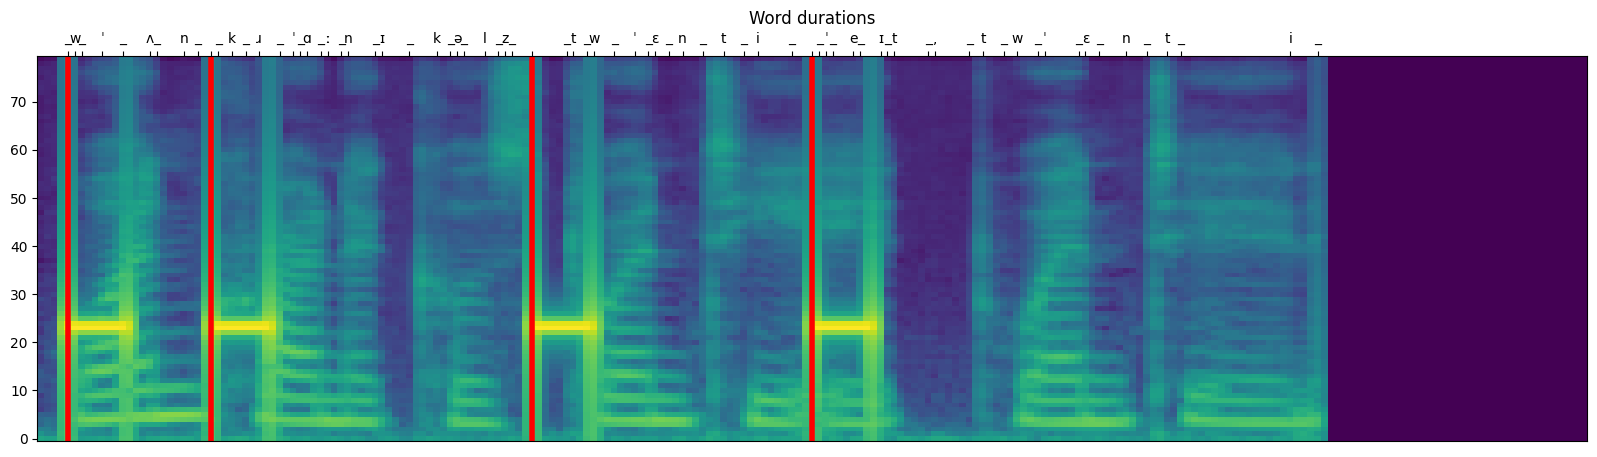

 ---- 
sentence: 1 Chronicles 28:20
custom split: ['1', 'Chronicles', '28:20']
word indices: [0, 9, 33, 49]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 573
Duration: 19.112925170068028
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/mountains_drone_35sec.mp4
1
19.112925170068028
36.08695652173913
36.08695652173913
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Jeremiah 5:22  to  output/mebible/Jeremiah_5v22.mp4
 > Text splitted to sentences.
['Do you not fear me?']
 > Processing time: 0.3333864212036133
 > Real-time factor: 0.20501926002732243
 ---- 
sentence: Do you not fear me?
split: 5 word indices: 5
sum split: 5 sum word indices: 5
 > Text splitted to sentences.
['declares the LORD.']
 > Processing time: 0.3636438846588135
 > Real-time factor: 0.1994216985855262
 ---- 
sentence: declares the LORD.
split: 3 word indices: 3
sum split: 8 sum word indices: 8
 > Text splitted to sentences.
['Do you not tre

<Figure size 640x480 with 0 Axes>

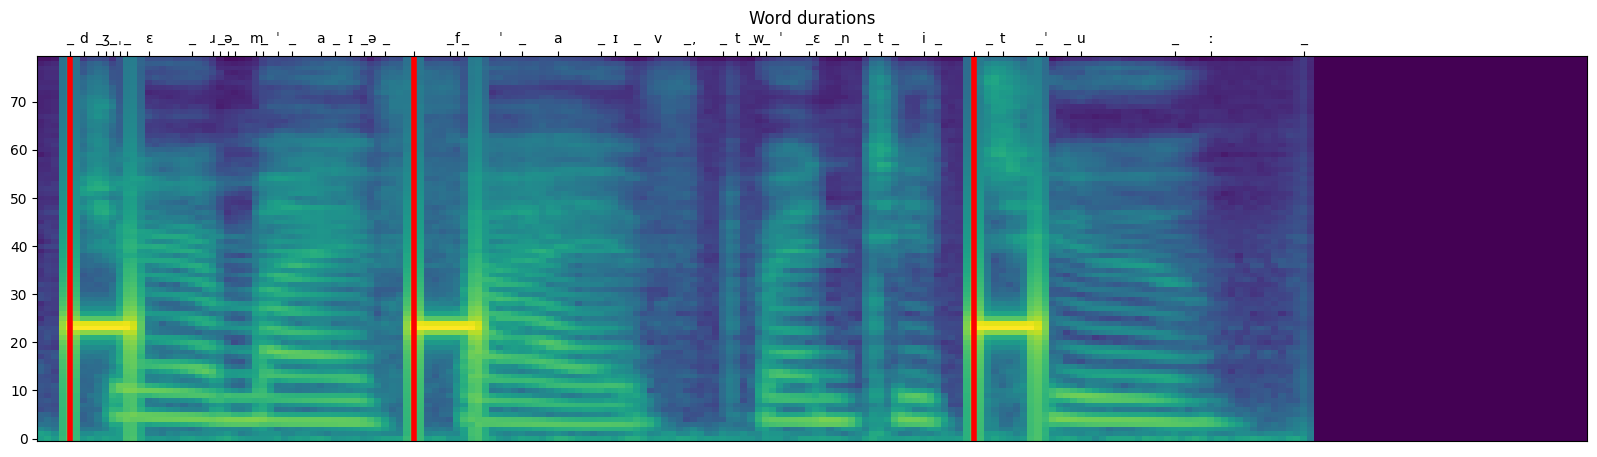

 ---- 
sentence: Jeremiah 5:22
custom split: ['Jeremiah', '5:22']
word indices: [0, 23, 51]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 523
Duration: 17.453424036281177
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
17.45342403628118
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Hebrews 4:14-16  to  output/mebible/Hebrews_4v14-16.mp4
 > Text splitted to sentences.
['Since then we have a great high priest who has passed through the heavens, Jesus, the Son of God, let us hold fast our confession.']
 > Processing time: 2.7754569053649902
 > Real-time factor: 0.35204109965081704
 ---- 
sentence: Since then we have a great high priest who has passed through the heavens, Jesus, the Son of God, let us hold fast our confession.
split: 25 word indices: 25
sum split: 25 sum word indices: 25
 > Text splitted to sentences.
['For we do not have a high priest who i

<Figure size 640x480 with 0 Axes>

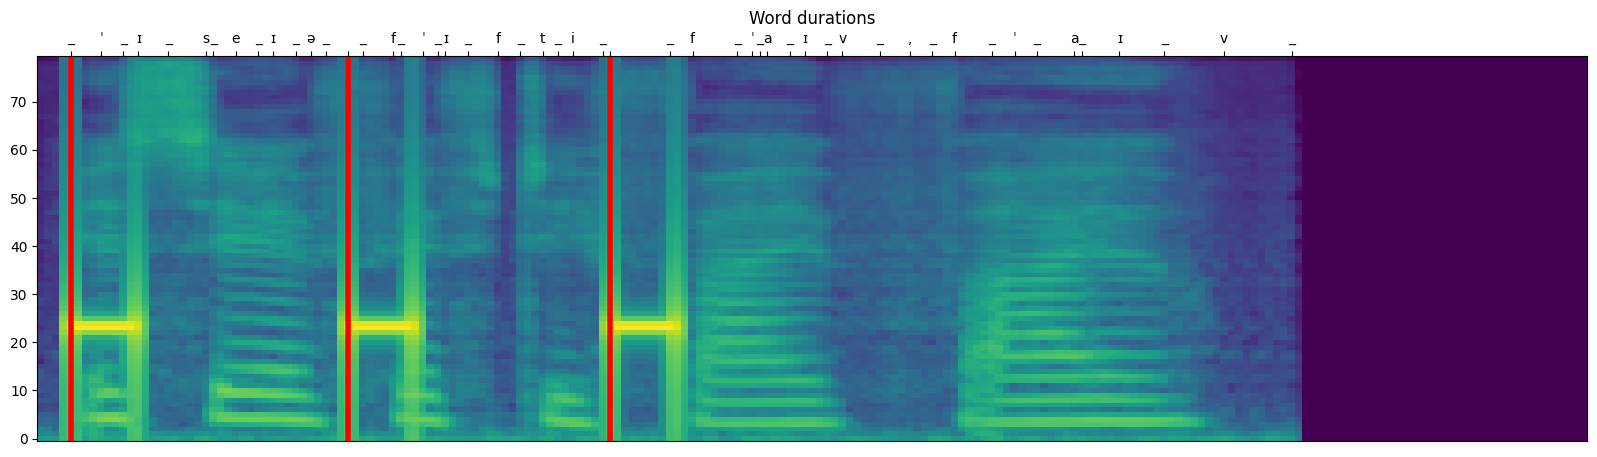

 ---- 
sentence: Isaiah 55:5
custom split: ['Isaiah', '55:5']
word indices: [0, 13, 27]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 378
Duration: 12.633106575963719
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/mountains_drone_35sec.mp4
1
12.633106575963719
36.08695652173913
36.08695652173913
@@@@@@@@@@@@@@$$$$$$$$$$


In [6]:
import csv

def generate_videos_from_csv(csv_path):
    with open(csv_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        for row in csvreader:
            location, verse, video_idea, translation, hebrew = row
            output_file = f"output/mebible/{location.replace(' ', '_').replace(':','v')}.mp4"
            print("Writing ", location, " to ", output_file)

            match_duration_with_tts("./videos/" + video_idea, verse, location, output_file)
            
generate_videos_from_csv('./text/bibleverses.csv')

